# Module 2: Data Analysis

## Sprint 4: Capstone Project

## About this Sprint

It is time for your second Capstone Project.
You will work on this project for the whole Sprint.

We are glad you have successfully reached the final Sprint of this Module.
You will put everything you have learned in this Module to work.
The outcome of this Sprint should potentially serve as your portfolio item, so try to show your best work!

The dataset for this Sprint is the Ultimate 25k+ Matches Football Database.
It is a large dataset, which will provide your with a lot of opportunities both for statistical inference and for prediction.
Once again you will not have concrete tasks or predefined questions - you'll have to be creative and crate a plan for yourself, how to explore the data.

You already had experience doing that while completing the capstone project for the Module 1.
In the industry it's your responsibility as a data scientist to come up with plans and hypothesis for the dataset, so this is an essential skill to practice.
Good luck!

## Objectives for this Part

- Practice identifying opportunities for data analysis, raising hypothesis, and formulating research tasks.
- Practice performing EDA, statistical inference, and prediction.
- Practice working with SQL datasets.
- Practice visualizing data.

## Data

**Ultimate 25k+ Matches Football Database**

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1489944440615-453fc2b6a9a9?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1482&q=80" /></div>

Imagine that you are a data scientist working in a sports betting company.
The business executives in your company after some initial analysis (they watched this video [Understanding European Soccer in Four Simple Steps: A Guide For Americans](https://www.youtube.com/watch?v=FZ4i3KX2CW4)) identified betting on soccer (European football) as an potential new business opportunity.
The problem is that your company doesn't know a lot about soccer (European football).
Your manager asked you to analyse this dataset and see if you can provide anything that could give us a competitive advantage in the attempt to start strong in the new endevor.
She has provided your with some questions, which she suggests are a good starting point for your analysis.

- Which leagues are in which countries?
- Which leagues score the most/fewest goals?
- Who are the top scorers in each team and league?
- Is there such a thing as home advantage?
- Can we predict how many goals each team will score in each match?
- Can we predict which team will win the match?

The link to the [Kaggle dataset is here](https://www.kaggle.com/prajitdatta/ultimate-25k-matches-football-database-european).

## Requirements

- Perform data cleaning and feature engineering. Work with features - handle missing data if needed, use SQL and Pandas functions to create other additional features.
- Perform exploratory data analysis. Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data. Grouping the data and analyzing the groups - using SQL or Pandas aggregate methods. Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.
- Perform statistical inference. Raise and test statistical hypotheses. Set appropriate significance levels and create confidence intervals for the variables of interest.
- Train linear machine learning models and use them for forecasting. Use cross validation, information criteria, and/or other methods to specify your models correctly. Choose and use appropriate metrics to measure your models' performance.
- Create a Google Data Studio dashboard with at least three different types of charts.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Present the project - the data, methods, and results.
- Provide suggestions about how your analysis can be improved.

## Bonus Challenges

As a data scientists you will spend significant amount of your time learning new things.
Sometimes you will do that for fun, but most of the time you will have an urgent problem and you will need to quickly learn some new skill to be able to solve it.
It is very important to gradually build this skill - it is extremely valuable for all data scientists.
The bonus challenges are designed to simulate these types of situations.
These challenges require you to do something that we haven't covered in the course yet.
Instead of trying to do all of the bonus challenges, concentrate on just one or two and do them well.
All of the bonus challenges are optional - no points will be deducted if you skip them.

- Try dimensionality reduction algorithm (e.g. PCA, t-SNE, Autoencoder).
- Try clustering your data.
- Try a nonlinear machine learning model to explain relationships between features and predict new values.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?
- Delivery of the presentation. How clear are your reasoning and explanations?
- Bonus challenges. Have you put extra effort to do one or more of the bonus challenges (no points will be deducted if you skip them)?

## Correction

During your project correction, you should present it as if talking to a technical team lead and a senior co-worker working in your team.
You can assume that they will have strong data science and software engineering skills - they will understand technical jargon, they are expected to notice things that could have been done better, ask about the choices you've made (especially if you've made some questionable choices).
In addition, be careful not to spend your time explaining trivial concepts or code snippets that are simple - your best bet is to focus your presentation on the more difficult portions of your code.

## Introduction

The Ultimate 25k+ Matches Football Database contains a wealth of information on European football matches and teams. In this project, we aim to analyze this data to identify trends and patterns that could inform our company's betting decisions in the European football market. By exploring the relationships between team attributes, player performance, and match outcomes, we hope to gain a competitive advantage and improve the accuracy of our predictions.

To achieve these goals, we will conduct exploratory data analysis, build machine learning models, and evaluate their performance. Through this process, we hope to uncover insights that will help us make informed and profitable betting decisions in the football market.

## Library & Data import

In [ ]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import xml.etree.ElementTree as ET

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    MaxAbsScaler,
)
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
conn = sqlite3.connect("/content/drive/MyDrive/Data/2.4./database.sqlite")
cursor = conn.cursor()

# EDA

## Understanding the data

In [ ]:

query = """
SELECT *
FROM sqlite_master
WHERE type = 'table';
"""

tables = pd.read_sql_query(query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...
8,table,attribute_improvement,attribute_improvement,3,CREATE TABLE attribute_improvement(\n team_lo...
9,table,match_new,match_new,305759,"CREATE TABLE ""match_new"" (\n""id"" INTEGER,\n ""..."


In [ ]:
query = """
SELECT *
FROM country
"""
country = pd.read_sql_query(query, conn)
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [ ]:
query = """
SELECT *
FROM team
"""
teams = pd.read_sql_query(query, conn)
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [ ]:
query = """
SELECT *
FROM player_attributes
"""
player_attributes = pd.read_sql_query(query, conn)
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
query = """
SELECT *
FROM player
"""
player = pd.read_sql_query(query, conn)
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [ ]:
query = """
SELECT *
FROM league
"""
league = pd.read_sql_query(query, conn)
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


### Missing data in match table

In [ ]:

query = """
SELECT *
FROM match
"""

matches = pd.read_sql_query(query, conn)

In [ ]:
missing_data_proportions = matches.groupby("season").apply(lambda
                                                           x: x.isna().mean())
missing_data_proportions = missing_data_proportions.round(2)
missing_data_proportions.iloc[:, 0:11]


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
season,,,,,,,,,,,
2008/2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009/2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012/2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015/2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
missing_data_proportions.iloc[:,11:31]

,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9
season,,,,,,,,,,,,,,,,,,,,
2008/2009,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26
2009/2010,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
2010/2011,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
2011/2012,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
2012/2013,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
2013/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014/2015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2015/2016,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
missing_data_proportions.iloc[:,31:51]

,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7
season,,,,,,,,,,,,,,,,,,,,
2008/2009,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26
2009/2010,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
2010/2011,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
2011/2012,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
2012/2013,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
2013/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014/2015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2015/2016,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
missing_data_proportions.iloc[:,51:71]

,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5
season,,,,,,,,,,,,,,,,,,,,
2008/2009,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.27,0.26,0.27,0.26,0.27,0.26,0.26,0.26,0.26,0.26,0.26
2009/2010,0.07,0.07,0.07,0.07,0.04,0.05,0.04,0.05,0.06,0.05,0.04,0.04,0.04,0.05,0.06,0.04,0.05,0.04,0.05,0.06
2010/2011,0.07,0.07,0.07,0.07,0.03,0.03,0.03,0.03,0.04,0.03,0.03,0.04,0.03,0.05,0.05,0.03,0.03,0.04,0.03,0.04
2011/2012,0.07,0.07,0.07,0.07,0.02,0.03,0.03,0.02,0.02,0.03,0.03,0.03,0.03,0.02,0.04,0.02,0.02,0.03,0.03,0.02
2012/2013,0.07,0.07,0.07,0.07,0.01,0.01,0.02,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.03,0.01,0.02,0.02,0.02,0.02
2013/2014,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00
2014/2015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00
2015/2016,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00


In [ ]:
missing_data_proportions.iloc[:,71:91]

,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA
season,,,,,,,,,,,,,,,,,,,,
2008/2009,0.26,0.26,0.26,0.26,0.27,0.26,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.13,0.13,0.13,0.13,0.13,0.13
2009/2010,0.05,0.04,0.04,0.05,0.06,0.06,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.13,0.13,0.13,0.13,0.13,0.13
2010/2011,0.03,0.03,0.04,0.04,0.04,0.05,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.13,0.13,0.13,0.13,0.13,0.13
2011/2012,0.03,0.02,0.03,0.03,0.03,0.03,0.47,0.47,0.47,0.47,0.47,0.47,0.47,0.47,0.13,0.13,0.13,0.13,0.13,0.13
2012/2013,0.01,0.01,0.01,0.02,0.02,0.03,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.44,0.13,0.13,0.13,0.13,0.13,0.13
2013/2014,0.00,0.00,0.00,0.00,0.01,0.01,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.14,0.14,0.14,0.14,0.14,0.14
2014/2015,0.00,0.01,0.00,0.01,0.01,0.01,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.13,0.13,0.13,0.13,0.13,0.13
2015/2016,0.01,0.00,0.01,0.00,0.01,0.01,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.13,0.13,0.13,0.13,0.13,0.13


In [ ]:
missing_data_proportions.iloc[:,91:]

,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
season,,,,,,,,,,,,,,,,,,,,,
2008/2009,0.13,0.13,0.13,0.13,0.13,0.13,1.00,1.00,1.00,0.13,...,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13
2009/2010,0.13,0.13,0.13,0.13,0.13,0.13,1.00,1.00,1.00,0.13,...,0.14,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13
2010/2011,0.13,0.13,0.13,0.13,0.13,0.13,1.00,1.00,1.00,0.13,...,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13
2011/2012,0.13,0.13,0.13,0.13,0.13,0.13,1.00,1.00,1.00,0.13,...,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13
2012/2013,0.13,0.13,0.13,0.13,0.13,0.13,0.14,0.14,0.14,0.13,...,0.13,0.13,0.13,0.13,0.14,0.14,0.14,0.13,0.13,0.13
2013/2014,0.15,0.15,0.15,0.14,0.14,0.14,0.15,0.15,0.15,0.14,...,0.14,0.14,0.14,0.14,1.00,1.00,1.00,1.00,1.00,1.00
2014/2015,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,...,0.90,0.13,0.13,0.13,1.00,1.00,1.00,1.00,1.00,1.00
2015/2016,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,...,1.00,0.13,0.13,0.13,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:

query = """
SELECT league.name,
       match.*
FROM MATCH
JOIN league 
ON match.country_id = league.country_id
"""
missing_matches_league = pd.read_sql_query(query, conn)
missing_matches_league_proportions = missing_matches_league.groupby("name").apply(
    lambda x: x.isna().mean()
)
missing_matches_league_proportions = missing_matches_league_proportions.round(2)
missing_matches_league_proportions.iloc[:, 78:98]


,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA
name,,,,,,,,,,,,,,,,,,,,
Belgium Jupiler League,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02
England Premier League,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
France Ligue 1,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Germany 1. Bundesliga,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Italy Serie A,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00
Netherlands Eredivisie,0.78,0.78,0.78,0.78,0.78,0.78,0.78,0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
Poland Ekstraklasa,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Portugal Liga ZON Sagres,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01
Scotland Premier League,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
columns = missing_matches_league_proportions.columns
pattern = (
    r"^(home_player_[1-9]|home_player_1[0-1]|away_player_[1-9]|away_player_1[0-1])$"
)

matching_columns = [col for col in columns if re.match(pattern, col)]
new_df = missing_matches_league_proportions[matching_columns]
new_df


,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
name,,,,,,,,,,,,,,,,,,,,,
Belgium Jupiler League,0.12,0.14,0.13,0.13,0.14,0.13,0.13,0.13,0.14,0.13,...,0.14,0.13,0.14,0.13,0.13,0.13,0.13,0.14,0.13,0.13
England Premier League,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
France Ligue 1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Germany 1. Bundesliga,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Italy Serie A,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02
Netherlands Eredivisie,0.09,0.08,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.10,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
Poland Ekstraklasa,0.25,0.28,0.27,0.29,0.29,0.30,0.24,0.28,0.27,0.31,...,0.27,0.28,0.29,0.30,0.29,0.25,0.30,0.28,0.32,0.39
Portugal Liga ZON Sagres,0.07,0.07,0.07,0.07,0.07,0.07,0.08,0.08,0.07,0.09,...,0.06,0.07,0.07,0.06,0.08,0.07,0.07,0.08,0.09,0.08
Scotland Premier League,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


**Observations about match data:**
- Data on match results is available for all seasons;
- 26% of 08/09 season matches has missing data about players in the match and their position on the pitch, compared to (09/10 to 12/13) seasons have only about 3% to 7% missing data. 13/14 to 15/16 seasons have less than 1% missing;
- English, French, German, Italian, Scotish and Spanish leagues have 99% of data available about players in the match.
- Data about different actions during the game (goal, corner, card, etc.) are in  XML string format, and about 30 to 60% of the data is missing. However, looking at the leagues we see that several leagues have more than 75 % of the data unavailable. 
- Pre game odds offered by different betting companies have unavailable data for Polish and Swiss leagues.

**Actions:**

- Analyse English, French, German, Italian and Spanish soccer leagues because there is the least missing data;
- If unable to fill missing values, remove the matches that have critical data missing;
- Use Bet365, betway and other betting sites which have the least missing data on pre-game betting odds.


In [ ]:
query = """
SELECT * FROM match
WHERE country_id IN (1729, 4769, 7809, 10257, 21518)
"""
match_new = pd.read_sql_query(query, conn)
match_new.to_sql("match_new", conn, if_exists="replace", index=False)


### Missing data in player attributes table

In [ ]:
query = """
SELECT STRFTIME('%Y', pa.date) AS year,
       player_name,
       STRFTIME('%Y', p.birthday) AS birthday,
       p.height,
       p.weight,
       pa.*
FROM player_attributes pa
JOIN player p ON pa.player_api_id = p.player_api_id
"""
player_attributes = pd.read_sql_query(query, conn)
player_attributes = player_attributes.drop(
    columns=["id", "player_fifa_api_id"]
)
player_attributes.head()


,year,player_name,birthday,height,weight,player_api_id,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2016,Aaron Appindangoye,1992,182.88,187,505942,2016-02-18 00:00:00,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2015,Aaron Appindangoye,1992,182.88,187,505942,2015-11-19 00:00:00,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2015,Aaron Appindangoye,1992,182.88,187,505942,2015-09-21 00:00:00,62.0,66.0,right,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,2015,Aaron Appindangoye,1992,182.88,187,505942,2015-03-20 00:00:00,61.0,65.0,right,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,2007,Aaron Appindangoye,1992,182.88,187,505942,2007-02-22 00:00:00,61.0,65.0,right,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
missing_player_attributes_proportions = player_attributes.groupby("year").apply(
    lambda x: x.isna().mean()
)
missing_player_attributes_proportions = missing_player_attributes_proportions.round(2)
missing_player_attributes_proportions.iloc[:, :20]


,year,player_name,birthday,height,weight,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy
year,,,,,,,,,,,,,,,,,,,,
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.05,0.05,0.10,0.05,0.05,0.05,0.05,0.05,0.09,0.05,0.09,0.05
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.07,0.00
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0.00
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
missing_player_attributes_proportions.iloc[:, 20:]

,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
year,,,,,,,,,,,,,,,,,,,,,
2007,0.05,0.05,0.05,0.05,0.09,0.05,0.09,0.05,0.09,0.05,...,0.09,0.05,0.05,0.05,0.09,0.05,0.05,0.05,0.05,0.05
2008,0.00,0.00,0.00,0.00,0.07,0.00,0.07,0.00,0.07,0.00,...,0.07,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00
2009,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0.00,0.05,0.00,...,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00
2010,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.02,0.00,...,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
2011,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2012,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


We see that most of the missing data here is from 2007-2010.

### Missing data in team attributes table

In [ ]:

query = """
SELECT ta.*, l.name AS league_name
FROM team_attributes AS ta
JOIN match AS m ON ta.team_api_id = m.home_team_api_id OR ta.team_api_id = m.away_team_api_id
JOIN league AS l ON m.country_id = l.country_id
GROUP BY ta.team_api_id;
"""

team_attributes_missing = pd.read_sql_query(query, conn)
team_attributes_missing_proportion = team_attributes_missing.groupby('league_name').apply(lambda x: x.isna().mean())
team_attributes_missing_proportion = team_attributes_missing_proportion.round(2)
team_attributes_missing_proportion.iloc[:,:13]

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass
league_name,,,,,,,,,,,,,
Belgium Jupiler League,0.0,0.0,0.0,0.0,0.0,0.0,0.87,0.0,0.0,0.0,0.0,0.0,0.0
England Premier League,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0
France Ligue 1,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0
Germany 1. Bundesliga,0.0,0.0,0.0,0.0,0.0,0.0,0.97,0.0,0.0,0.0,0.0,0.0,0.0
Italy Serie A,0.0,0.0,0.0,0.0,0.0,0.0,0.97,0.0,0.0,0.0,0.0,0.0,0.0
Netherlands Eredivisie,0.0,0.0,0.0,0.0,0.0,0.0,0.88,0.0,0.0,0.0,0.0,0.0,0.0
Poland Ekstraklasa,0.0,0.0,0.0,0.0,0.0,0.0,0.91,0.0,0.0,0.0,0.0,0.0,0.0
Portugal Liga ZON Sagres,0.0,0.0,0.0,0.0,0.0,0.0,0.87,0.0,0.0,0.0,0.0,0.0,0.0
Scotland Premier League,0.0,0.0,0.0,0.0,0.0,0.0,0.94,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
team_attributes_missing_proportion.iloc[:,13:]

,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,league_name
league_name,,,,,,,,,,,,,
Belgium Jupiler League,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
England Premier League,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France Ligue 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Germany 1. Bundesliga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Italy Serie A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Netherlands Eredivisie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Poland Ekstraklasa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Portugal Liga ZON Sagres,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Scotland Premier League,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Team attributes table have missing values only in build up play dribbling.

## Who are the top scorers?

In [ ]:
query = """
SELECT country_id,
       season,
       home_team_api_id,
       away_team_api_id,
       home_team_goal,
       away_team_goal,
       goal
FROM match_new
"""

scorers = pd.read_sql_query(query, conn)
scorers.head()

,country_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal
0,1729,2008/2009,10260,10261,1,1,<goal><value><comment>n</comment><stats><goals...
1,1729,2008/2009,9825,8659,1,0,<goal><value><comment>n</comment><stats><goals...
2,1729,2008/2009,8472,8650,0,1,<goal><value><comment>n</comment><stats><goals...
3,1729,2008/2009,8654,8528,2,1,<goal><value><comment>n</comment><stats><goals...
4,1729,2008/2009,10252,8456,4,2,<goal><value><comment>n</comment><stats><goals...


In [ ]:
scorers.loc[0,"goal"]

'<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298</n><type>goal</type><goal_type>n</goal_type></value></goal>'

Information about the goal scorers in a match is stored in the Goal column in XML format. To extract goal scorer player id, I created a function witch exctract goal scorer IDs.

In [ ]:
def extract_goal_scorer_id(xml_data):
    """
    Extracts goal scorer IDs from XML data and returns a string containing the goal scorer IDS.
    """
    if xml_data is None:
        return ''
    root = ET.fromstring(xml_data)
    goal_scorer_ids = []
    for value in root.findall('value'):
        player1 = value.find('player1')
        if player1 is not None:
            goal_scorer_ids.append(player1.text)
    return ','.join(goal_scorer_ids)

In [ ]:
scorers["scorers"] = scorers["goal"].apply(extract_goal_scorer_id)
scorers["season"] = scorers["season"].apply(lambda x: x[:4])

In [ ]:
scorers = scorers.assign(scorer=scorers["scorers"].str.split(",")).explode("scorer")
scorers.dropna(inplace=True)


In [ ]:
top_scorers_l = (
    scorers.groupby(["country_id", "scorer"]).size().reset_index(name="goals")
)
top_scorers_l = top_scorers_l[top_scorers_l["scorer"] != ""]
top_scorers_league = (
    top_scorers_l.sort_values(["country_id", "goals"], ascending=[True, False])
    .groupby("country_id")
    .head(1)
)
top_scorers_league["scorer"] = top_scorers_league["scorer"].astype("int")


In [ ]:
top_scorers_league = top_scorers_league.merge(
    league[["country_id", "name"]],
    left_on="country_id",
    right_on="country_id",
    how="left",
)
top_scorers_league = top_scorers_league.merge(
    player[["player_api_id", "player_name"]],
    left_on="scorer",
    right_on="player_api_id",
    how="left",
)
top_scorers_league = top_scorers_league.drop(
    ["country_id", "scorer", "player_api_id"], axis=1
)
top_scorers_league.head()


,goals,name,player_name
0,135,England Premier League,Wayne Rooney
1,120,France Ligue 1,Zlatan Ibrahimovic
2,124,Germany 1. Bundesliga,Robert Lewandowski
3,156,Italy Serie A,Antonio Di Natale
4,295,Spain LIGA BBVA,Lionel Messi


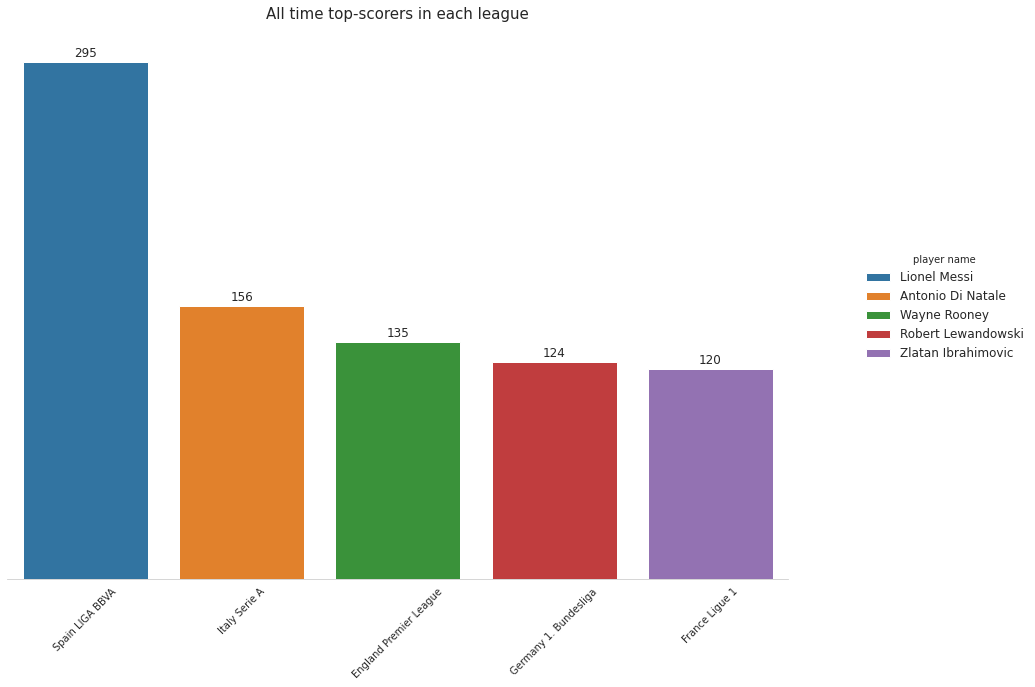

In [ ]:
top_scorers_league = top_scorers_league.sort_values(by="goals", ascending=False)


fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(
    "name",
    "goals",
    hue="player_name",
    data=top_scorers_league,
    dodge=False,
    ax=ax,
)


for i, (name, goals) in enumerate(
    zip(top_scorers_league["name"], top_scorers_league["goals"])
):
    ax.text(
        i,
        goals + 3,
        int(goals),
        ha="center",
        fontsize=12,
    )

ax.legend(
    title="player name",
    fontsize=12,
    loc="center",
    ncol=1,
    bbox_to_anchor=(1.2, 0.5),
    facecolor="white",
    edgecolor="white",
)

plt.title(
    "All time top-scorers in each league",
    fontsize=15,
    y=1.02,
)

ax.set_ylabel("")
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xlabel("")
plt.xticks(rotation=45)

sns.despine(left=True)
plt.show()


In [ ]:
goal_counts = scorers.groupby(["season", "scorer"]).size().reset_index(name="goals")
goal_counts = goal_counts[goal_counts["scorer"] != ""]
goal_counts = goal_counts.sort_values(["season", "goals"], ascending=[True, False])

In [ ]:
query = """
SELECT *
FROM player
"""
player = pd.read_sql_query(query, conn)

goal_counts["scorer"] = goal_counts["scorer"].astype("int")
goal_counts = goal_counts.merge(
    player[["player_api_id", "player_name"]],
    left_on="scorer",
    right_on="player_api_id",
    how="left",
)
goal_counts = goal_counts.drop(["player_api_id", "scorer"], axis=1)
goal_counts.head()


,season,goals,player_name
0,2008,33,Samuel Eto'o
1,2008,32,Diego Forlan
2,2008,30,David Villa
3,2008,28,Grafite
4,2008,27,Diego Milito


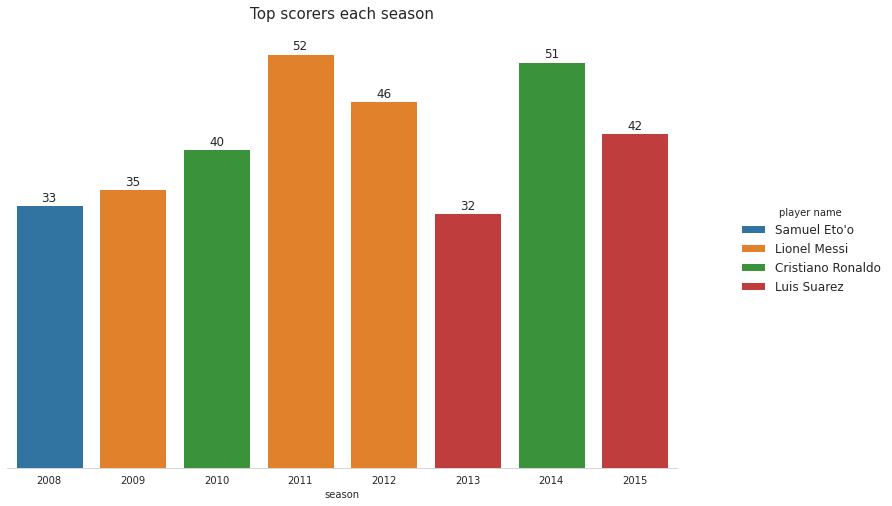

In [ ]:
top_scorers = goal_counts.groupby("season").first()
top_scorers.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot("season", "goals", hue="player_name", data=top_scorers, dodge=False, ax=ax)

for i in range(len(top_scorers)):
    ax.text(
        i,
        top_scorers.loc[i, "goals"] + top_scorers["goals"].max() * 0.01,
        int(top_scorers.loc[i, "goals"]),
        ha="center",
        fontsize=12,
    )

ax.legend(
    title="player name",
    fontsize=12,
    loc="center",
    ncol=1,
    bbox_to_anchor=(1.2, 0.5),
    facecolor="white",
    edgecolor="white",
)
plt.title(
    "Top scorers each season",
    fontsize=15,
    y=1.02,
)
ax.set_ylabel("")
ax.set_yticklabels([])
ax.set_yticks([])
sns.despine(left=True)
plt.show()


Lionel Messi was the highest scoring player in the Spanish league with 295 goals. He also was the highest scoring player for 2009,2011 and 2012 seasons.

## Is there an advantage playing at home?

The hypothesis is that teams tend to perform better when playing at home, resulting in a higher probability of winning or scoring more goals. I will look at home and away records of each team and see if there is a statistically significant difference in the performance.

In [ ]:

query = """
SELECT home_team_api_id,
       team_long_name,
       COUNT(*) AS total_matches_played_at_home,
       SUM(CASE
               WHEN home_team_goal > away_team_goal THEN 1
               ELSE 0
           END) AS total_matches_won_at_home
FROM MATCH
JOIN team ON home_team_api_id = team_api_id
GROUP BY home_team_api_id,
         team_long_name
"""

match_outcomes_home = pd.read_sql_query(query, conn)
match_outcomes_home["win_rate_at_home"] = (
    match_outcomes_home["total_matches_won_at_home"]
    / match_outcomes_home["total_matches_played_at_home"]
)
match_outcomes_home.head()



,home_team_api_id,team_long_name,total_matches_played_at_home,total_matches_won_at_home,win_rate_at_home
0,1601,Ruch Chorzów,120,54,0.450000
1,1773,Oud-Heverlee Leuven,45,16,0.355556
2,1957,Jagiellonia Białystok,120,63,0.525000
3,2033,S.C. Olhanense,75,19,0.253333
4,2182,Lech Poznań,120,74,0.616667


In [ ]:

query = """
SELECT away_team_api_id,
       team_long_name,
       COUNT(*) AS total_matches_played_away,
       SUM(CASE
               WHEN home_team_goal < away_team_goal THEN 1
               ELSE 0
           END) AS total_matches_won_away
FROM MATCH
JOIN team ON away_team_api_id = team_api_id
GROUP BY away_team_api_id,
         team_long_name
"""

match_outcomes_away = pd.read_sql_query(query, conn)
match_outcomes_away["win_rate_away"] = (
    match_outcomes_away["total_matches_won_away"]
    / match_outcomes_away["total_matches_played_away"]
)
match_outcomes_away.head()

,away_team_api_id,team_long_name,total_matches_played_away,total_matches_won_away,win_rate_away
0,1601,Ruch Chorzów,120,38,0.316667
1,1773,Oud-Heverlee Leuven,45,6,0.133333
2,1957,Jagiellonia Białystok,120,24,0.200000
3,2033,S.C. Olhanense,75,13,0.173333
4,2182,Lech Poznań,120,50,0.416667


In [ ]:
merged_df = pd.merge(match_outcomes_home, match_outcomes_away, on="team_long_name")

merged_df["win_rate_diff"] = merged_df["win_rate_at_home"] - merged_df["win_rate_away"]

# Include teams that have played at least 30 home & away games
merged_df = merged_df[
    (merged_df["total_matches_played_at_home"] >= 30)
    & (merged_df["total_matches_played_away"] >= 30)
]

t, p = stats.ttest_ind(
    merged_df["win_rate_at_home"], merged_df["win_rate_away"], equal_var=False
)

if p < 0.05:
    print("The difference in win rates is statistically significant")
else:
    print("The difference in win rates is not statistically significant")


The difference in win rates is statistically significant


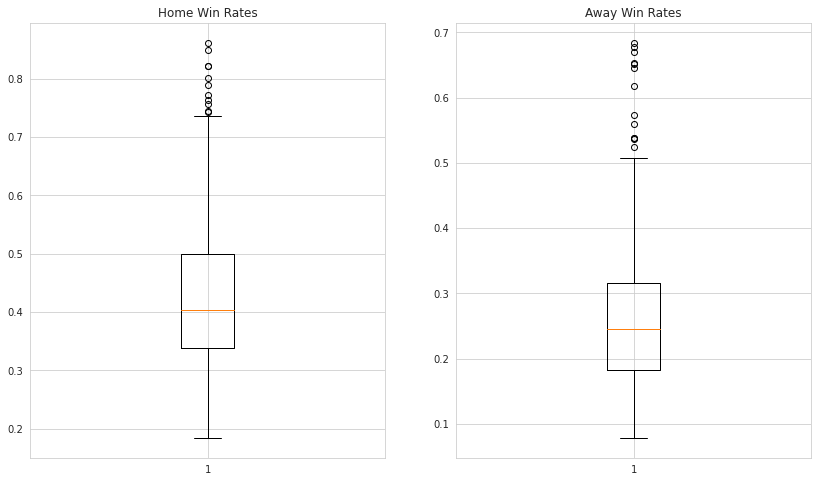

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

ax[0].boxplot(merged_df['win_rate_at_home'])
ax[0].set_title("Home Win Rates")

ax[1].boxplot(merged_df['win_rate_away'])
ax[1].set_title("Away Win Rates")

plt.show()

We can clearly see that there is a home team advantage. Comparing the home and away win rates, there is about 0.15 higher probabilty that a home team will win. Also we can see that some teams have a very high win rate both at home and away.

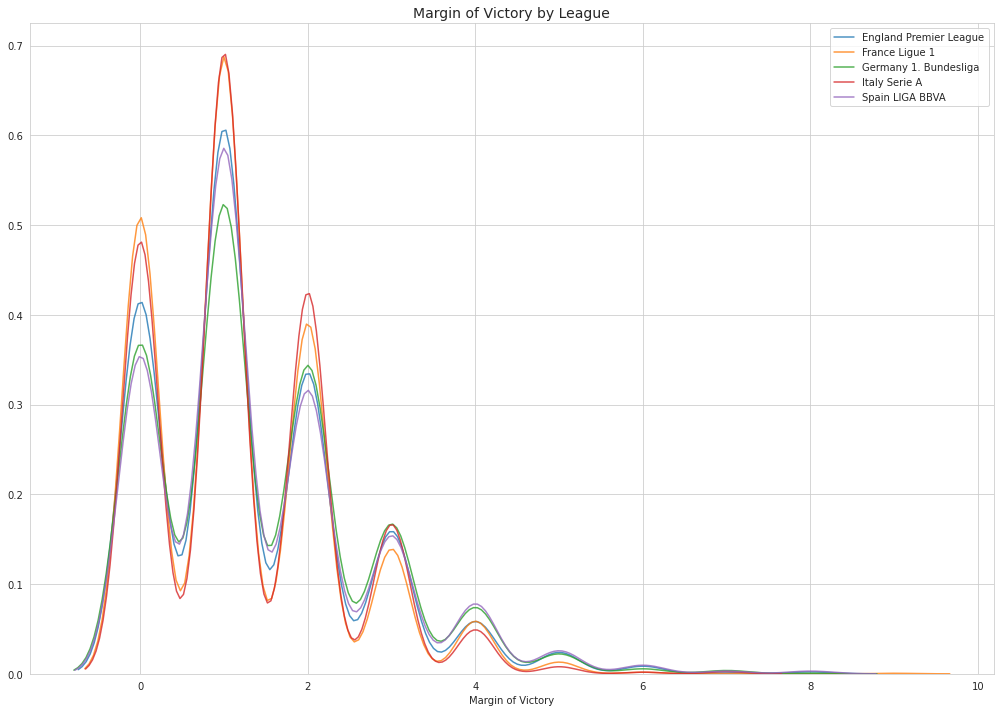

In [ ]:
query = """
SELECT l.name, ABS(home_team_goal - away_team_goal) as margin_of_victory
FROM match_new m
JOIN league l 
ON m.country_id = l.country_id
"""

margin_of_victory = pd.read_sql_query(query, conn)

league_group = margin_of_victory.groupby("name")

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 10))

for name, group in league_group:
    sns.kdeplot(group["margin_of_victory"], label=name, alpha=0.8)

ax.set_xlabel("Margin of Victory")
ax.set_ylabel("")
ax.set_title("Margin of Victory by League", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()


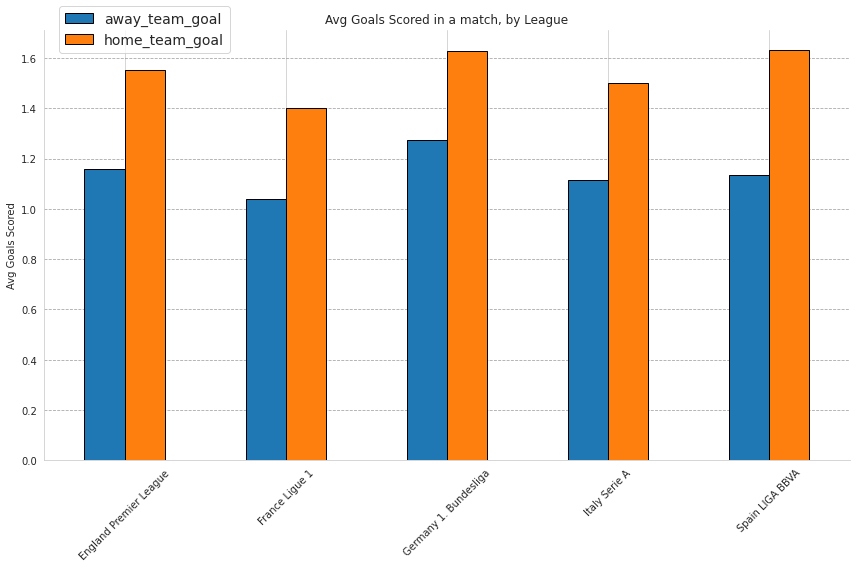

In [ ]:
query = """
SELECT l.name, home_team_api_id, home_team_goal, away_team_api_id, away_team_goal
FROM match_new m
JOIN league l 
ON m.country_id = l.country_id
"""
home_vs_away_goals = pd.read_sql_query(query, conn)

grouped = home_vs_away_goals.groupby("name").agg(
    {"away_team_goal": "mean", "home_team_goal": "mean"}
)
fig, ax = plt.subplots(figsize=(12, 8))
grouped.plot.bar(rot=0, ax=ax, color=["#1f77b4", "#ff7f0e"], edgecolor="black")
ax.set_xlabel("")
ax.set_ylabel("Avg Goals Scored")
ax.set_title("Avg Goals Scored in a match, by League")
ax.grid(axis="y", linestyle="--", color="gray", alpha=0.7)
ax.legend(loc="center left", bbox_to_anchor=(0.01, 1), prop={"size": 14})
plt.xticks(rotation=45)
plt.tight_layout()
sns.despine()
plt.show()

In [ ]:
home_vs_away_goals["result"] = home_vs_away_goals[
    ["home_team_goal", "away_team_goal"]
].apply(lambda x: f"{min(x)}:{max(x)}", axis=1)
result_counts = home_vs_away_goals["result"].value_counts()

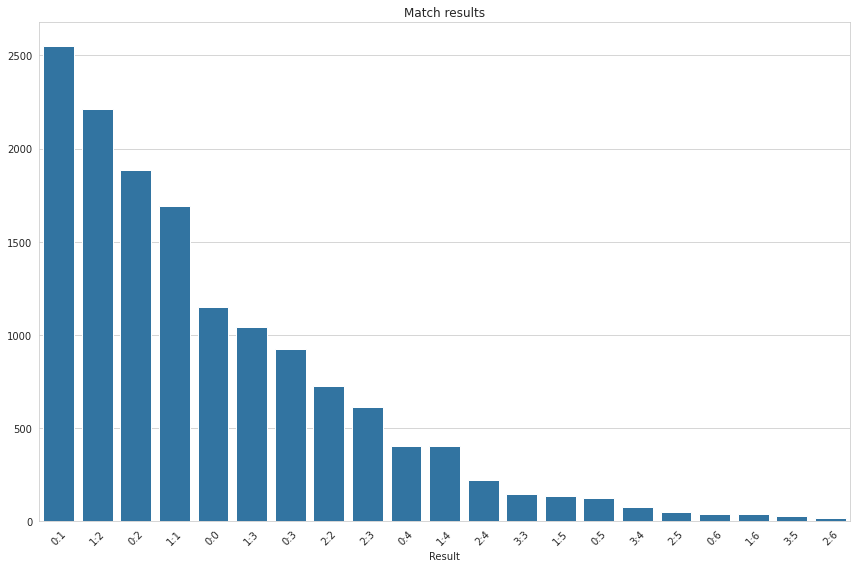

In [ ]:

result_table = result_counts[result_counts >= 20].to_frame().reset_index()
result_table.columns = ["Result", "Count"]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="Result", y="Count", data=result_table, color="#1f77b4")

ax.set_xlabel("Result")
ax.set_ylabel("")
ax.set_title("Match results")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the graphs above we can see that 
- French league has the most games ending in a draw;
- Italian and French leagues have more similar strenght match-ups,while
- German, English and Spanish leagues have the most matches where one team is dominating the other;
- French league has the lowest scoring matches, while German and Spanish leagues the highest scoring matches;
- Most games are low scoring matches.

## Trends and patterns in the team attribute data

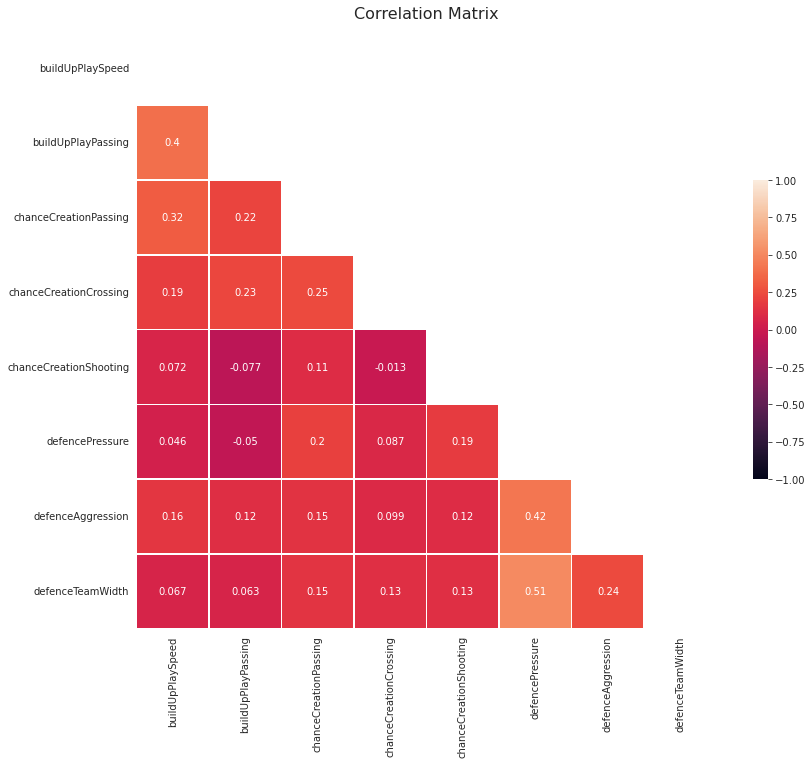

In [ ]:

query = """
SELECT 
       buildUpPlaySpeed,
       buildUpPlayPassing,
       chanceCreationPassing,
       chanceCreationCrossing,
       chanceCreationShooting,
       defencePressure,
       defenceAggression,
       defenceTeamWidth
FROM team_attributes
"""

league_attributes = pd.read_sql_query(query, conn)

plt.figure(figsize=(13, 11))
corr = league_attributes.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(
    corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    annot=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
heatmap.set_title(
    "Correlation Matrix",
    fontdict={"fontsize": 16},
    pad=12,
);



Here we see that there are no two team attributes that have a high correlation except defence pressure and defence team width who are mildly correlated.

**Do the trends in team attributes vary by league?**

In [ ]:

query = """
SELECT l.name AS league,
       c.name AS country,
       m.season AS season,
       AVG(buildUpPlaySpeed) AS avg_buildUpPlaySpeed,
       AVG(buildUpPlayDribbling) AS avg_buildUpPlayDribbling,
       AVG(buildUpPlayPassing) AS avg_buildUpPlayPassing,
       AVG(chanceCreationPassing) AS avg_chanceCreationPassing,
       AVG(chanceCreationCrossing) AS avg_chanceCreationCrossing,
       AVG(chanceCreationShooting) AS avg_chanceCreationShooting,
       AVG(defencePressure) AS avg_defencePressure,
       AVG(defenceAggression) AS avg_defenceAggression,
       AVG(defenceTeamWidth) AS avg_defenceTeamWidth
       
FROM team_attributes ta
JOIN match_new m ON ta.team_api_id = m.home_team_api_id
OR ta.team_api_id = m.away_team_api_id
JOIN league l ON m.league_id = l.id
JOIN country c ON l.country_id = c.id
GROUP BY league,
         season
"""

league_attributes = pd.read_sql_query(query, conn)
league_attributes.head()


,league,country,season,avg_buildUpPlaySpeed,avg_buildUpPlayDribbling,avg_buildUpPlayPassing,avg_chanceCreationPassing,avg_chanceCreationCrossing,avg_chanceCreationShooting,avg_defencePressure,avg_defenceAggression,avg_defenceTeamWidth
0,England Premier League,England,2008/2009,56.766667,38.525,52.858333,50.508333,56.600000,51.541667,43.658333,49.166667,49.658333
1,England Premier League,England,2009/2010,56.116667,38.400,54.050000,51.333333,57.450000,51.716667,44.483333,50.291667,50.883333
2,England Premier League,England,2010/2011,56.425000,38.925,53.691667,51.616667,56.900000,52.058333,44.541667,49.908333,50.858333
3,England Premier League,England,2011/2012,55.516667,38.725,52.791667,50.775000,56.175000,52.441667,45.366667,50.425000,51.400000
4,England Premier League,England,2012/2013,55.566667,38.325,51.291667,50.350000,56.541667,52.200000,45.600000,49.866667,51.000000


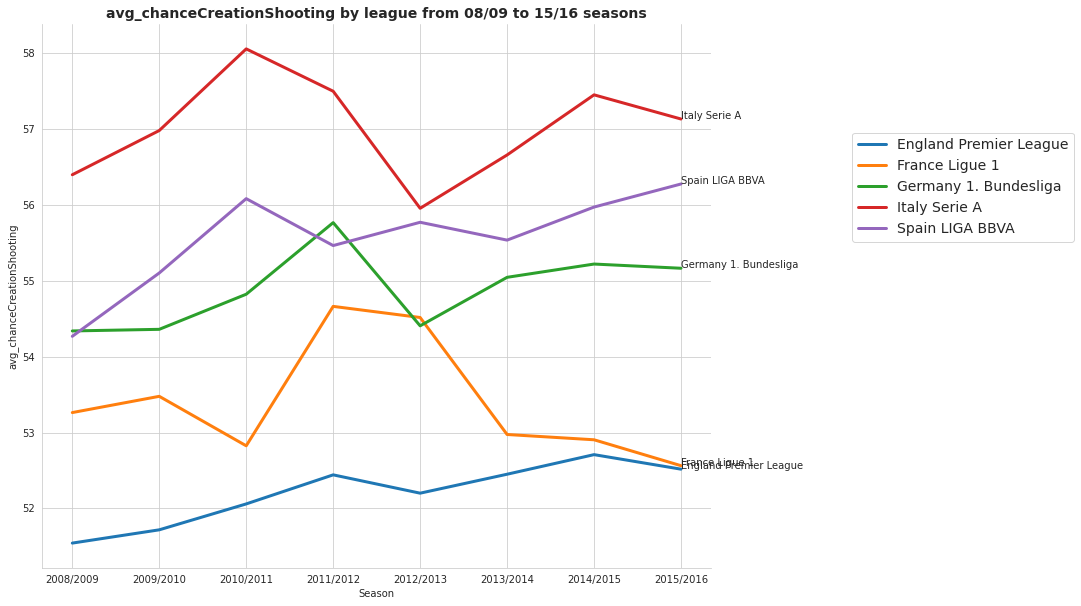

In [ ]:
def plot_team_attributes_by_league_over_seasons(column_name):
    fig, ax = plt.subplots(figsize=(12, 10))

    for league, group in league_attributes.groupby("league"):
        ax.plot(group["season"], group[column_name], label=league, linewidth=3)
        ax.annotate(league, (group["season"].iloc[-1], group[column_name].iloc[-1]))

    ax.set_xlabel("Season")
    ax.set_ylabel(column_name)
    ax.set_title(
        f"{column_name} by league from 08/09 to 15/16 seasons",
        fontsize=14,
        fontweight="bold",
    )
    ax.legend(loc="center left", bbox_to_anchor=(1.2, 0.7), prop={"size": 14})
    sns.despine()
    plt.show()

plot_team_attributes_by_league_over_seasons('avg_chanceCreationShooting')

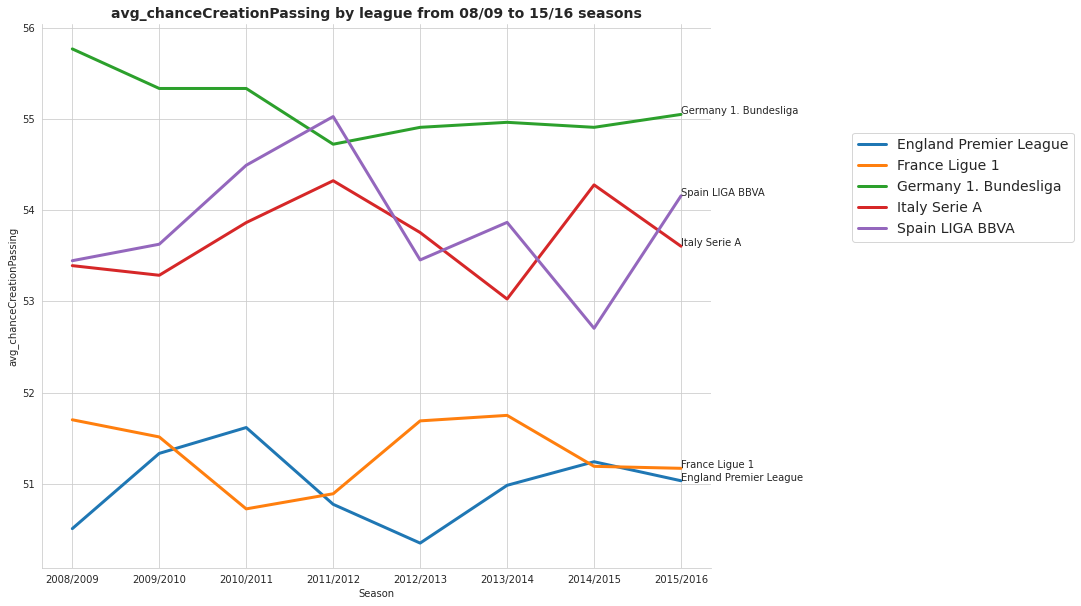

In [ ]:
plot_team_attributes_by_league_over_seasons('avg_chanceCreationPassing')

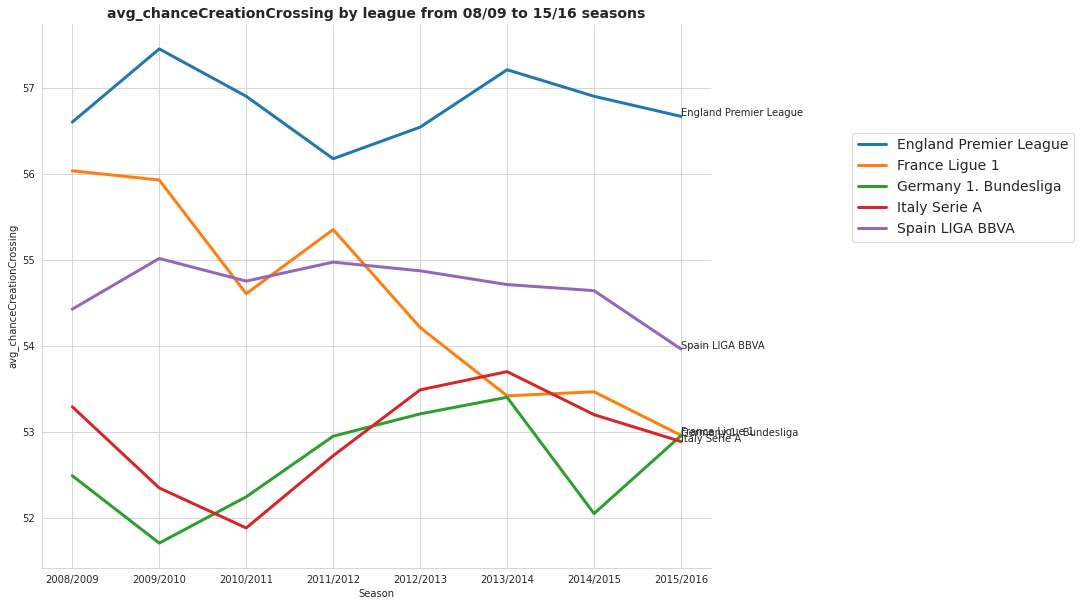

In [ ]:
plot_team_attributes_by_league_over_seasons('avg_chanceCreationCrossing')

From the chance creation attribute trends we can see that English league teams are the best chance creators with crossing. German teams are great at creating chances with passing, while Italian and Spanish teams are better at chance creation with shooting.

In [ ]:

query = """

WITH team_attributes_2010 AS
  (SELECT team_api_id,
          chanceCreationPassing AS ccp_2010,
          chanceCreationCrossing AS ccc_2010,
          chanceCreationShooting AS ccs_2010,
          buildUpPlaySpeed AS bps_2010,
          buildUpPlayPassing AS bpp_2010,
          defencePressure AS dp_2010,
          defenceAggression AS da_2010,
          defenceTeamWidth AS dtw_2010
   FROM team_attributes
   WHERE date BETWEEN '2010-01-01' AND '2010-12-31' ),
     team_attributes_2015 AS
  (SELECT team_api_id,
          chanceCreationPassing AS ccp_2015,
          chanceCreationCrossing AS ccc_2015,
          chanceCreationShooting AS ccs_2015,
          buildUpPlaySpeed AS bps_2015,
          buildUpPlayPassing AS bpp_2015,
          defencePressure AS dp_2015,
          defenceAggression AS da_2015,
          defenceTeamWidth AS dtw_2015
   FROM team_attributes
   WHERE date BETWEEN '2015-01-01' AND '2015-12-31' ),
     improvements AS
  (SELECT team_attributes_2010.team_api_id,
          ccp_2015 - ccp_2010 AS chance_creation_passing_improvement,
          ccc_2015 - ccc_2010 AS chance_creation_crossing_improvement,
          ccs_2015 - ccs_2010 AS chance_creation_shooting_improvement,
          bps_2015 - bps_2010 AS build_up_speed_improvement,
          bpp_2015 - bpp_2010 AS build_up_passing_improvement,
          dp_2015 - dp_2010 AS defence_pressure_improvement,
          da_2015 - da_2010 AS defence_aggression_improvement,
          dtw_2015 - dtw_2010 AS defence_team_width_improvement
   FROM team_attributes_2010
   JOIN team_attributes_2015 ON team_attributes_2010.team_api_id = team_attributes_2015.team_api_id)
SELECT team.team_long_name,
       improvements.*,
       (chance_creation_passing_improvement + chance_creation_crossing_improvement + chance_creation_shooting_improvement) AS chance_creation_improvement,
       (build_up_speed_improvement + build_up_passing_improvement) AS build_up_improvement,
       (defence_pressure_improvement + defence_aggression_improvement + defence_team_width_improvement) AS defence_improvement,
       (chance_creation_passing_improvement + chance_creation_crossing_improvement + chance_creation_shooting_improvement + build_up_speed_improvement + build_up_passing_improvement + defence_pressure_improvement + defence_aggression_improvement + defence_team_width_improvement) AS total_improvement
FROM improvements
JOIN team ON team.team_api_id = improvements.team_api_id
WHERE improvements.team_api_id IN
    (SELECT home_team_api_id
     FROM match_new)
  OR improvements.team_api_id IN
    (SELECT away_team_api_id
     FROM match_new);
"""

cursor.execute("CREATE TABLE IF NOT EXISTS attribute_improvement AS " + query)
conn.commit()



In [ ]:

query = """
SELECT team.team_long_name,
       strftime('%Y', date) AS year,
       chance_creation_improvement,
       team_attributes.*
FROM team_attributes
JOIN team ON team.team_api_id = team_attributes.team_api_id
JOIN attribute_improvement ON attribute_improvement.team_api_id = team_attributes.team_api_id
WHERE team_attributes.team_api_id IN
    (SELECT team_api_id
     FROM attribute_improvement
     ORDER BY chance_creation_improvement ASC
     LIMIT 5)
ORDER BY chance_creation_improvement DESC,
         YEAR ASC
"""

top_5_teams_improvement = pd.read_sql_query(query, conn)
top_5_teams_improvement = top_5_teams_improvement.drop(
    ["id", "team_fifa_api_id", "team_api_id", "date"], axis=1
)
top_5_teams_improvement["year"] = top_5_teams_improvement["year"].astype("int")
top_5_teams_improvement.head()




,team_long_name,year,chance_creation_improvement,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,Chelsea,2010,-77,70,Fast,NaN,Little,60,Mixed,Free Form,...,70,Lots,Free Form,30,Deep,60,Press,35,Normal,Cover
1,Chelsea,2011,-77,60,Balanced,NaN,Little,50,Mixed,Free Form,...,80,Lots,Free Form,35,Medium,55,Press,50,Normal,Cover
2,Chelsea,2012,-77,60,Balanced,NaN,Little,45,Mixed,Organised,...,45,Normal,Organised,60,Medium,62,Press,46,Normal,Cover
3,Chelsea,2013,-77,46,Balanced,NaN,Little,41,Mixed,Organised,...,63,Normal,Organised,42,Medium,43,Press,46,Normal,Cover
4,Chelsea,2014,-77,67,Fast,52.0,Normal,38,Mixed,Organised,...,68,Lots,Organised,39,Medium,41,Press,46,Normal,Cover


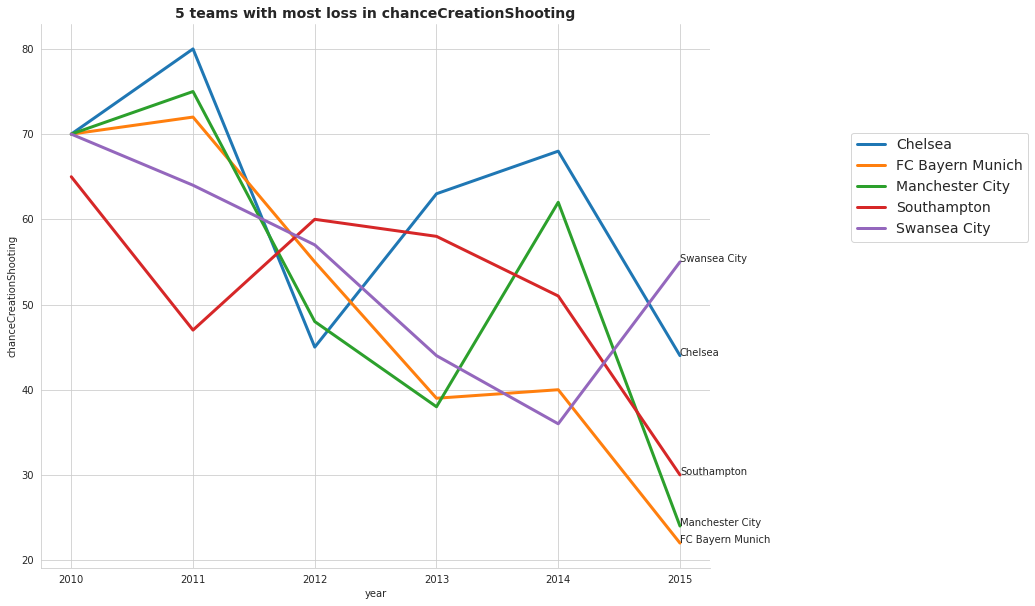

In [ ]:
def plot_team_improvement_over_seasons(df, column_name):
    fig, ax = plt.subplots(figsize=(12, 10))

    for team, group in df.groupby("team_long_name"):
        ax.plot(group["year"], group[column_name], label=team, linewidth=3)
        ax.annotate(team, (group["year"].iloc[-1], group[column_name].iloc[-1]))

    ax.set_xlabel("year")
    ax.set_ylabel(column_name)
    ax.set_title(
        f"5 teams with most loss in {column_name}",
        fontsize=14,
        fontweight="bold",
    )
    ax.legend(loc="center left", bbox_to_anchor=(1.2, 0.7), prop={"size": 14})
    sns.despine()
    plt.show()


plot_team_improvement_over_seasons(top_5_teams_improvement, "chanceCreationShooting")


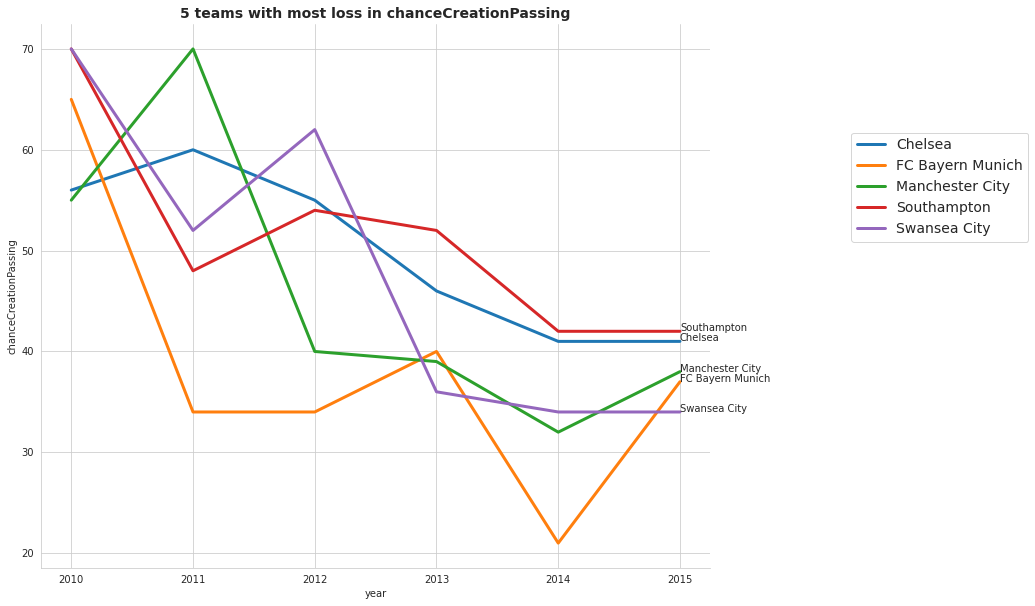

In [ ]:
plot_team_improvement_over_seasons(top_5_teams_improvement,"chanceCreationPassing")

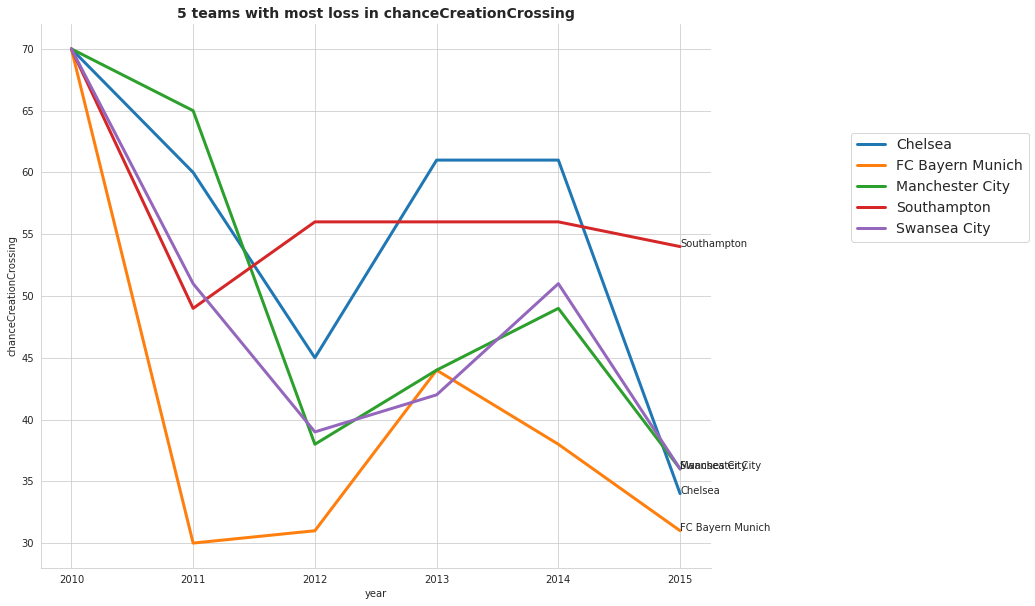

In [ ]:
plot_team_improvement_over_seasons(top_5_teams_improvement,"chanceCreationCrossing")

We can see here that well-known teams have their chance creation performance decreasing over the years. Although it is probable that in 2010 all teams were assigned a score of 70 and that is why we see their performance decreasing so drastically. Nevertheless, not taking 2010 into account we can say that the chance creation performance has been become worse.

# Predicting home team win

## Preparing data

In [ ]:
query = """
SELECT date, player_api_id,
             overall_rating as rating
FROM Player_Attributes
ORDER BY date ASC;
"""

player_attributes = pd.read_sql_query(query, conn)
player_attributes.dropna(inplace=True)
player_attributes["date"] = pd.to_datetime(player_attributes["date"])

player_attributes.head()

,date,player_api_id,rating
0,2007-02-22,505942,61.0
1,2007-02-22,155782,53.0
2,2007-02-22,162549,59.0
3,2007-02-22,30572,71.0
4,2007-02-22,23780,75.0


In [ ]:
def calc_elo(df_sorted, k=20, home_advantage=69):
    teams = df_sorted[["home_team_api_id", "away_team_api_id"]].stack().unique()
    team_elos = {team: 1500 for team in teams}
    df_sorted["home_team_elo"] = None
    df_sorted["away_team_elo"] = None

    for index, row in df_sorted.iterrows():
        home_team = row["home_team_api_id"]
        away_team = row["away_team_api_id"]
        home_team_elo = team_elos[home_team]
        away_team_elo = team_elos[away_team]
        home_score = row["home_team_goal"]
        away_score = row["away_team_goal"]
        expected_outcome = 1 / (
            1 + 10 ** ((away_team_elo - home_team_elo + home_advantage) / 400)
        )
        if home_score > away_score:
            outcome = 1
        elif home_score < away_score:
            outcome = 0
        else:
            outcome = 0.5
        team_elos[home_team] = home_team_elo + k * (outcome - expected_outcome)
        team_elos[away_team] = away_team_elo + k * (
            (1 - outcome) - (1 - expected_outcome)
        )
        df_sorted.at[index, "home_team_elo"] = home_team_elo
        df_sorted.at[index, "away_team_elo"] = away_team_elo

    return df_sorted


In [ ]:
query = """
SELECT m.*, CASE
  WHEN home_team_goal > away_team_goal THEN 2
  WHEN home_team_goal = away_team_goal THEN 1
    ELSE 0
  END AS home_team_result  
FROM match_new m
ORDER BY date ASC;
"""
player_team_data_x = pd.read_sql_query(query, conn)

columns = player_team_data_x.columns
pattern = (
    r"^(home_player_[1-9]|home_player_1[0-1]|away_player_[1-9]|away_player_1[0-1])$"
)
player_list = [col for col in columns if re.match(pattern, col)]
matching_columns = [
    "date",
    "home_team_api_id",
    "away_team_api_id",
    "home_team_goal",
    "away_team_goal",
    "home_team_result",
    "B365H",
    "B365D",
    "B365A",
] + player_list
match_data = player_team_data_x[matching_columns]
match_data = calc_elo(match_data)
match_data.dropna(inplace=True)
match_data["date"] = pd.to_datetime(match_data["date"])
match_data.head()


,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_result,B365H,B365D,B365A,home_player_1,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_team_elo,away_team_elo
1,2008-08-09,9827,7819,2,1,2,1.57,3.6,6.50,30458.0,...,46338.0,11327.0,26420.0,26191.0,11329.0,18913.0,35410.0,46261.0,1500,1500
2,2008-08-09,9746,9831,1,0,2,2.30,3.0,3.40,41186.0,...,26304.0,41019.0,30908.0,41122.0,26325.0,39987.0,94318.0,38108.0,1500,1500
4,2008-08-09,9829,9847,1,0,2,2.40,3.1,3.10,145039.0,...,26357.0,30457.0,30695.0,35499.0,32578.0,32572.0,37554.0,26312.0,1500,1500
5,2008-08-09,8481,8639,0,0,1,2.15,3.1,3.60,26233.0,...,77741.0,26154.0,26291.0,26160.0,20401.0,32575.0,35407.0,26156.0,1500,1500
7,2008-08-09,9874,9855,1,2,0,1.91,3.2,4.33,26359.0,...,32755.0,46709.0,31037.0,93480.0,5217.0,26285.0,33599.0,103482.0,1500,1500


In [ ]:
for player in player_list:
    match_data[player] = match_data[player].astype("int64")
    p = player_attributes.rename(
        columns={col: f"{player}_{col}" for col in ["date", "rating"]}
    )
    match_data = pd.merge_asof(
        match_data,
        p,
        left_on="date",
        right_on=f"{player}_date",
        left_by=player,
        right_by="player_api_id",
        allow_exact_matches=False,
    )
    match_data = match_data.drop([f"{player}_date", player, "player_api_id"], axis=1)


In [ ]:
query = """
SELECT date, team_api_id,
            buildUpPlaySpeed,
            buildUpPlayPassing,
            chanceCreationPassing,
            chanceCreationCrossing,
            chanceCreationShooting,
            defencePressure,
            defenceAggression,
            defenceTeamWidth
FROM team_attributes
ORDER BY date ASC;
"""

team_attributes = pd.read_sql_query(query, conn)
team_attributes["date"] = pd.to_datetime(team_attributes["date"])
team_attributes.head()


,date,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,2010-02-22,9930,60,50,60,65,55,50,55,45
1,2010-02-22,8485,70,70,70,70,70,60,70,70
2,2010-02-22,8576,60,40,45,35,55,30,70,30
3,2010-02-22,8564,45,30,55,45,70,30,35,60
4,2010-02-22,10215,30,30,50,60,55,30,30,30


In [ ]:
for team_id in ["home_team_api_id", "away_team_api_id"]:
    t = team_attributes.rename(
        columns={
            col: f"{team_id[:9]}_{col}" for col in list(team_attributes.columns[2:])
        }
    )

    match_data = pd.merge_asof(
        match_data,
        t,
        left_on="date",
        right_on="date",
        left_by=team_id,
        right_by="team_api_id",
    )

    match_data = match_data.drop("team_api_id", axis=1)

match_data.dropna(inplace=True)


In [ ]:
b365_match_win_prob = match_data[["B365H", "B365D", "B365A"]].copy()

for col in b365_match_win_prob.columns:
    b365_match_win_prob.loc[:, f"{col}_prob"] = 1 / b365_match_win_prob.loc[:, col]
for prob in ["B365H_prob", "B365D_prob", "B365A_prob"]:
    b365_match_win_prob.loc[:, prob] = b365_match_win_prob.loc[
        :, prob
    ] / b365_match_win_prob[["B365H_prob", "B365D_prob", "B365A_prob"]].sum(axis=1)


In [ ]:
b365_match_win_prob["predicted_result"] = (
    b365_match_win_prob[["B365H_prob", "B365D_prob", "B365A_prob"]]
    .idxmax(axis=1)
    .map({"B365H_prob": 2, "B365D_prob": 1, "B365A_prob": 0})
)

In [ ]:
b365_match_win_prob.head()

,B365H,B365D,B365A,B365H_prob,B365D_prob,B365A_prob,predicted_result
2583,1.57,4.0,5.5,0.595964,0.243242,0.178074,2
2584,1.20,6.5,15.0,0.790754,0.152132,0.066036,2
2585,2.90,3.1,2.5,0.323051,0.308503,0.387764,0
2586,2.10,3.3,3.5,0.447154,0.292529,0.278638,2
2587,2.00,3.3,3.8,0.468960,0.292741,0.256775,2


In [ ]:
Y = match_data["home_team_result"]

In [ ]:
X = match_data.iloc[:, 11:]

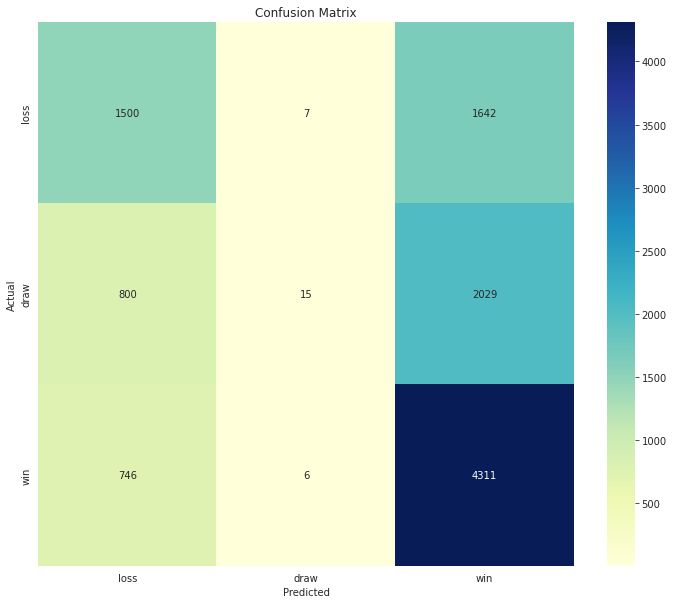

              precision    recall  f1-score   support

        loss       0.49      0.48      0.48      3149
        draw       0.54      0.01      0.01      2844
         win       0.54      0.85      0.66      5063

    accuracy                           0.53     11056
   macro avg       0.52      0.44      0.39     11056
weighted avg       0.53      0.53      0.44     11056



In [ ]:
predicted = b365_match_win_prob["predicted_result"]
actual = Y
labels = ["loss", "draw", "win"]

conf_matrix = confusion_matrix(actual, predicted)
plt.figure(figsize=(12, 10))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    xticklabels=labels,
    yticklabels=labels,
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(Y, predicted, target_names=labels))


B365 match odds have a 53% accuracy at predicting the match result. B365 aso predicts a home team win approx every 5th match. 

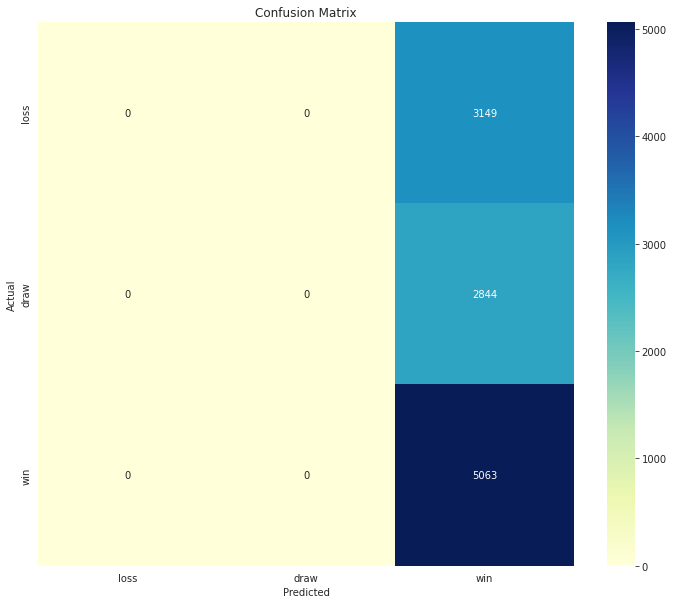

              precision    recall  f1-score   support

        loss       0.00      0.00      0.00      3149
        draw       0.00      0.00      0.00      2844
         win       0.46      1.00      0.63      5063

    accuracy                           0.46     11056
   macro avg       0.15      0.33      0.21     11056
weighted avg       0.21      0.46      0.29     11056



In [ ]:
predicted = pd.Series([2] * len(Y))
actual = Y
labels = ["loss", "draw", "win"]

conf_matrix = confusion_matrix(actual, predicted)
plt.figure(figsize=(12, 10))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    xticklabels=labels,
    yticklabels=labels,
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(Y, predicted, target_names=labels))


If we predicted home team win for every match, we would have 46% accuracy.

## Logistic regression

In [ ]:
win_class_size = (Y == 2).sum()
draw_class_size = (Y == 1).sum()
loss_class_size = (Y == 0).sum()

print("Win class size:", win_class_size)
print("Draw class size:", draw_class_size)
print("Loss class size:", loss_class_size)

Win class size: 5063
Draw class size: 2844
Loss class size: 3149


There is a high number of wins for home teams compared to draws or losses.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=11)


In [ ]:
model_pipeline = Pipeline(
    [("scaler", MinMaxScaler()), ("classifier", LogisticRegression())]
)

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

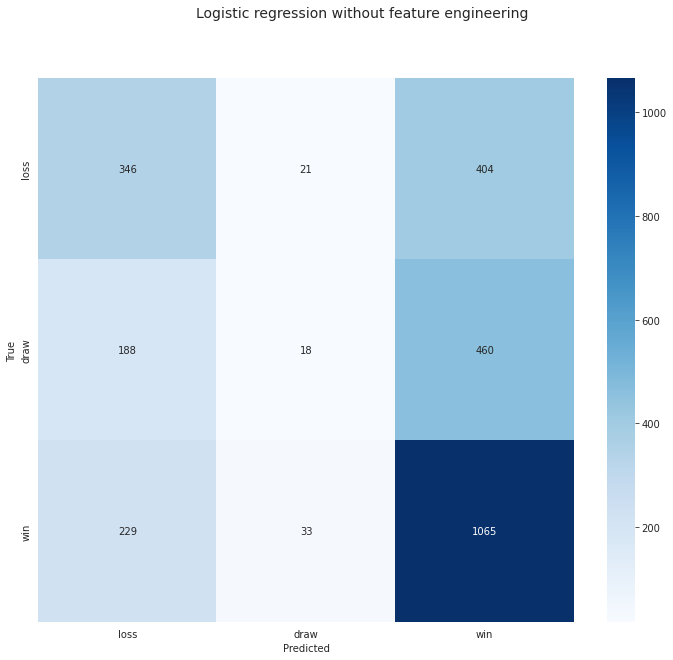

              precision    recall  f1-score   support

        loss       0.45      0.45      0.45       771
        draw       0.25      0.03      0.05       666
         win       0.55      0.80      0.65      1327

    accuracy                           0.52      2764
   macro avg       0.42      0.43      0.38      2764
weighted avg       0.45      0.52      0.45      2764



In [ ]:
labels = ["loss", "draw", "win"]
plt.figure(figsize=(12, 10))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.suptitle("Logistic regression without feature engineering", fontsize=14)
plt.show()

print(classification_report(y_test, y_pred, target_names=labels))


The model predicts 80% of actual wins correctly, while predicting losses worse and having a very poor performance predicting draws.

## Feature engineering

In [ ]:
X_ = match_data.iloc[:, 9:]

In [ ]:
home_players_list = [f"home_player_{str(x)}_rating" for x in range(1, 12)]
away_players_list = [f"away_player_{str(x)}_rating" for x in range(1, 12)]

for func in ["sum", "mean", "median", "std", "min", "max"]:
    X_[f"home_player_{func}"] = X[home_players_list].apply(func, axis=1)
    X_[f"away_player_{func}"] = X[away_players_list].apply(func, axis=1)

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, Y, random_state=11)



In [ ]:
model_pipeline = Pipeline(
    [("scaler", MinMaxScaler()), ("classifier", LogisticRegression())]
)

model_pipeline.fit(X_train_, y_train_)

y_pred_e = model_pipeline.predict(X_test_)

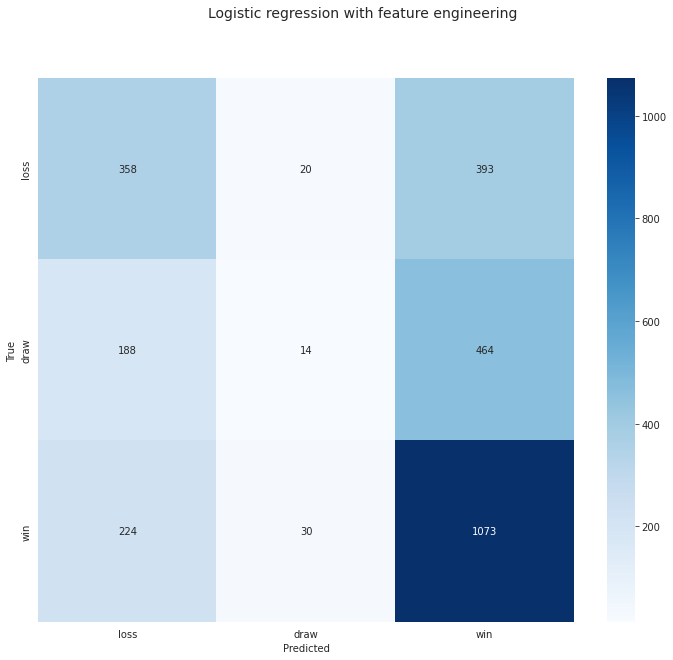

              precision    recall  f1-score   support

        loss       0.46      0.46      0.46       771
        draw       0.22      0.02      0.04       666
         win       0.56      0.81      0.66      1327

    accuracy                           0.52      2764
   macro avg       0.41      0.43      0.39      2764
weighted avg       0.45      0.52      0.46      2764



In [ ]:
plt.figure(figsize=(12, 10))
conf_matrix = confusion_matrix(y_test_, y_pred_e)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.suptitle("Logistic regression with feature engineering", fontsize=14)
plt.show()

print(classification_report(y_test_, y_pred_e, target_names=labels))


Feature engineering didn't improve the model significantly. The overall accuracy reamained unchanged at 52%.

#Predicting number of goals in a match

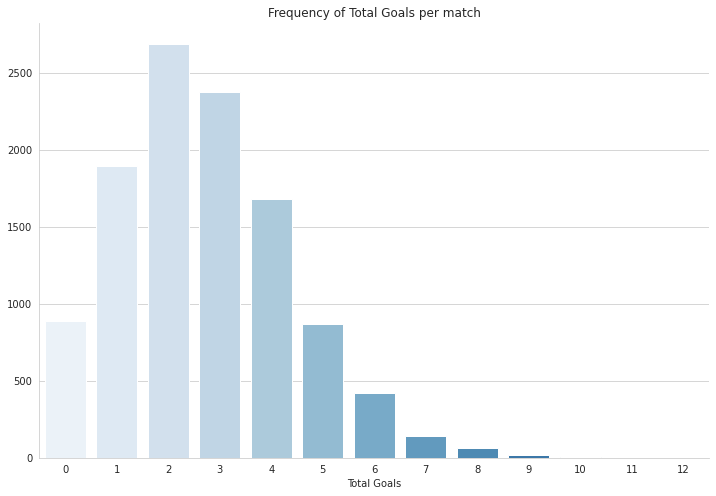

In [ ]:
match_data["total_goals"] = (
    match_data["home_team_goal"] + match_data["away_team_goal"]
)
plt.figure(figsize=(12, 8))
sns.countplot(x="total_goals", data=match_data, palette="Blues")
plt.xlabel("Total Goals")
plt.ylabel("")
plt.title("Frequency of Total Goals per match")
sns.despine()
plt.show()


In [ ]:
match_data = match_data[match_data['total_goals'] < 9]


In [ ]:
Y_g = match_data['total_goals']
X_g = match_data.iloc[:,11:]

In [ ]:
X_g.drop('total_goals',axis=1, inplace=True)

In [ ]:
home_players_list = [f"home_player_{str(x)}_rating" for x in range(1, 12)]
away_players_list = [f"away_player_{str(x)}_rating" for x in range(1, 12)]

for func in ["sum", "mean", "median", "std", "min", "max"]:
    X_g[f"home_player_{func}"] = X_g[home_players_list].apply(func, axis=1)
    X_g[f"away_player_{func}"] = X_g[away_players_list].apply(func, axis=1)

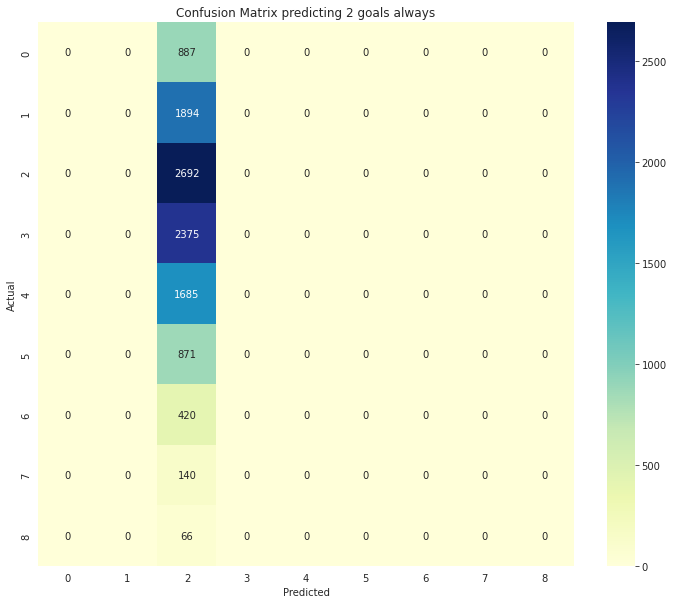

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       887
           1       0.00      0.00      0.00      1894
           2       0.24      1.00      0.39      2692
           3       0.00      0.00      0.00      2375
           4       0.00      0.00      0.00      1685
           5       0.00      0.00      0.00       871
           6       0.00      0.00      0.00       420
           7       0.00      0.00      0.00       140
           8       0.00      0.00      0.00        66

    accuracy                           0.24     11030
   macro avg       0.03      0.11      0.04     11030
weighted avg       0.06      0.24      0.10     11030



In [ ]:
predicted_g = pd.Series([2]*len(Y_g))
actual = Y_g

conf_matrix = confusion_matrix(actual, predicted_g)
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix predicting 2 goals always')
plt.show()
predicted_g
print(classification_report(actual, predicted_g))

In [ ]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_g, Y_g, random_state=21
)

In [ ]:
model_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression(random_state=11, multi_class="multinomial")),
    ]
)

model_pipeline.fit(X_train_g, y_train_g)

y_pred_g = model_pipeline.predict(X_test_g)


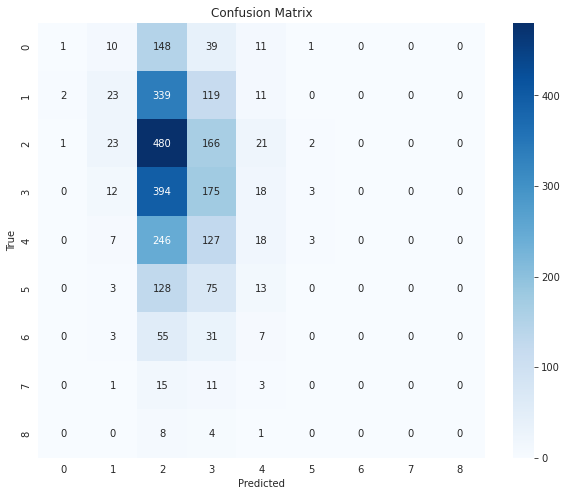

              precision    recall  f1-score   support

           0       0.25      0.00      0.01       210
           1       0.28      0.05      0.08       494
           2       0.26      0.69      0.38       693
           3       0.23      0.29      0.26       602
           4       0.17      0.04      0.07       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        96
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        13

    accuracy                           0.25      2758
   macro avg       0.13      0.12      0.09      2758
weighted avg       0.21      0.25      0.18      2758



In [ ]:
conf_matrix = confusion_matrix(y_test_g, y_pred_g)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test_g, y_pred_g))

 Multinomal logistic regression model predicts goal amount with 25 % overall accuracy which is 1% better than predicting 2 goals all the time.

While this model predicts 2 goals worse than the baseline model, we have better performance at predicting 1,3 and 4 goals.

# Conclusion

In this project I analyzed Europe football league matches from 2008 to 2015 to gain insights about how to better predict the match outcomes. During this project I identified several interesting things like:
- Lionel Messi was the highest scoring player in 2008 to 2015 seasons and during this time he scored 295 goals playing in the Spain Liga;
- Hypothesis test confirmed that teams have higher win rate when playing at home;
- French league tends to have low-scoring matches while German and Spanish league games tend to be the opposite;
- English league teams are the best chance creators with crossing while German teams are better at passing.

We also created two models - one to predict home team win and the other to predict how many goals will be scored in a game.


The first model can predict match winner with 52% accuracy but performs poorly when predicting draws.

The second model was able to prodict the number of goals in a match with 25% overall accuracy. It has a decent ability at predicting 1&2&3&4 goals but performs terrible at predicting other results.

The models could be improved by creating more relevant features and including feature importance.